In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
list(colormaps)
cmap = 'gist_heat'

In [23]:
dtFactor = 0.4
Trotter_time = np.arange(dtFactor,14*dtFactor,dtFactor)

def getEVsFromCharge(p_charge):
    n_sites = p_charge.shape[0]
    n_qubits = 2*n_sites-1

    center = int((n_qubits-1)/2)
    
    evs = np.ones(n_qubits)
    for i in range(len(evs)):
        if i%2==0:
            evs[i] = 1-p_charge[int(i/2)]
            if i<center:
                for j in np.arange(i,center,1):
                    if j%2==1:
                        evs[j] -= p_charge[int(i/2)]
                        
            if i>center:
                for j in np.arange(center,i,1):
                    if j%2==1:
                        evs[j] -= p_charge[int(i/2)]
                
    return evs

def Symmetrize(p):
    return 0.5*(p+np.flip(p))
    
    

In [79]:
evs_list_noSym = np.load("evs_list_nopSym.npy", allow_pickle=True)
evs_list = np.load("evs_list.npy", allow_pickle=True)

In [69]:
#load the npz file, "TEBD_Ns27_mu0.0_f0.2_J1.0_Tf5.6_Nstep14.npz
truth_file = np.load("TEBD_Ns27_mu0.0_f0.2_J1.0_Tf5.6_Nstep14.npz", allow_pickle=True)
truth = truth_file['density'][1:]
for i in range(truth.shape[0]):
    for j in range(truth.shape[1]):
        if j % 2 == 0:
            truth[i][j] = (1-truth[i][j])/2
        else:
            truth[i][j] = (1+truth[i][j])/2


In [103]:
#depolarization; Load torino depo files in the depo folder:
torino_depoSym = np.load("Depolarization/torino_depoSym.npy", allow_pickle=True)
torino_depo = np.load("Depolarization/torino_depo.npy", allow_pickle=True)

torino_depoSym = torino_depoSym[:-1]
torino_depo = torino_depo[:-1]


In [66]:
def plot(evs_list, J=1, LabelSize=20):
    plt.figure(1)
    plt.figure(figsize=(30,15))
    plt.imshow(evs_list, interpolation='none',origin='lower',cmap = cmap)

    y=Trotter_time *J
    plt.yticks(range(len(y)), np.round(y,2))
    plt.xlabel('qubits',fontsize=1.5*LabelSize)
    plt.ylabel(r'$tJ$',fontsize=1.5*LabelSize)
    plt.tick_params(axis='both', which='major', labelsize=LabelSize)
    cbar = plt.colorbar(fraction=0.03, pad=0.08)
    cbar.ax.tick_params(labelsize=20)


<Figure size 640x480 with 0 Axes>

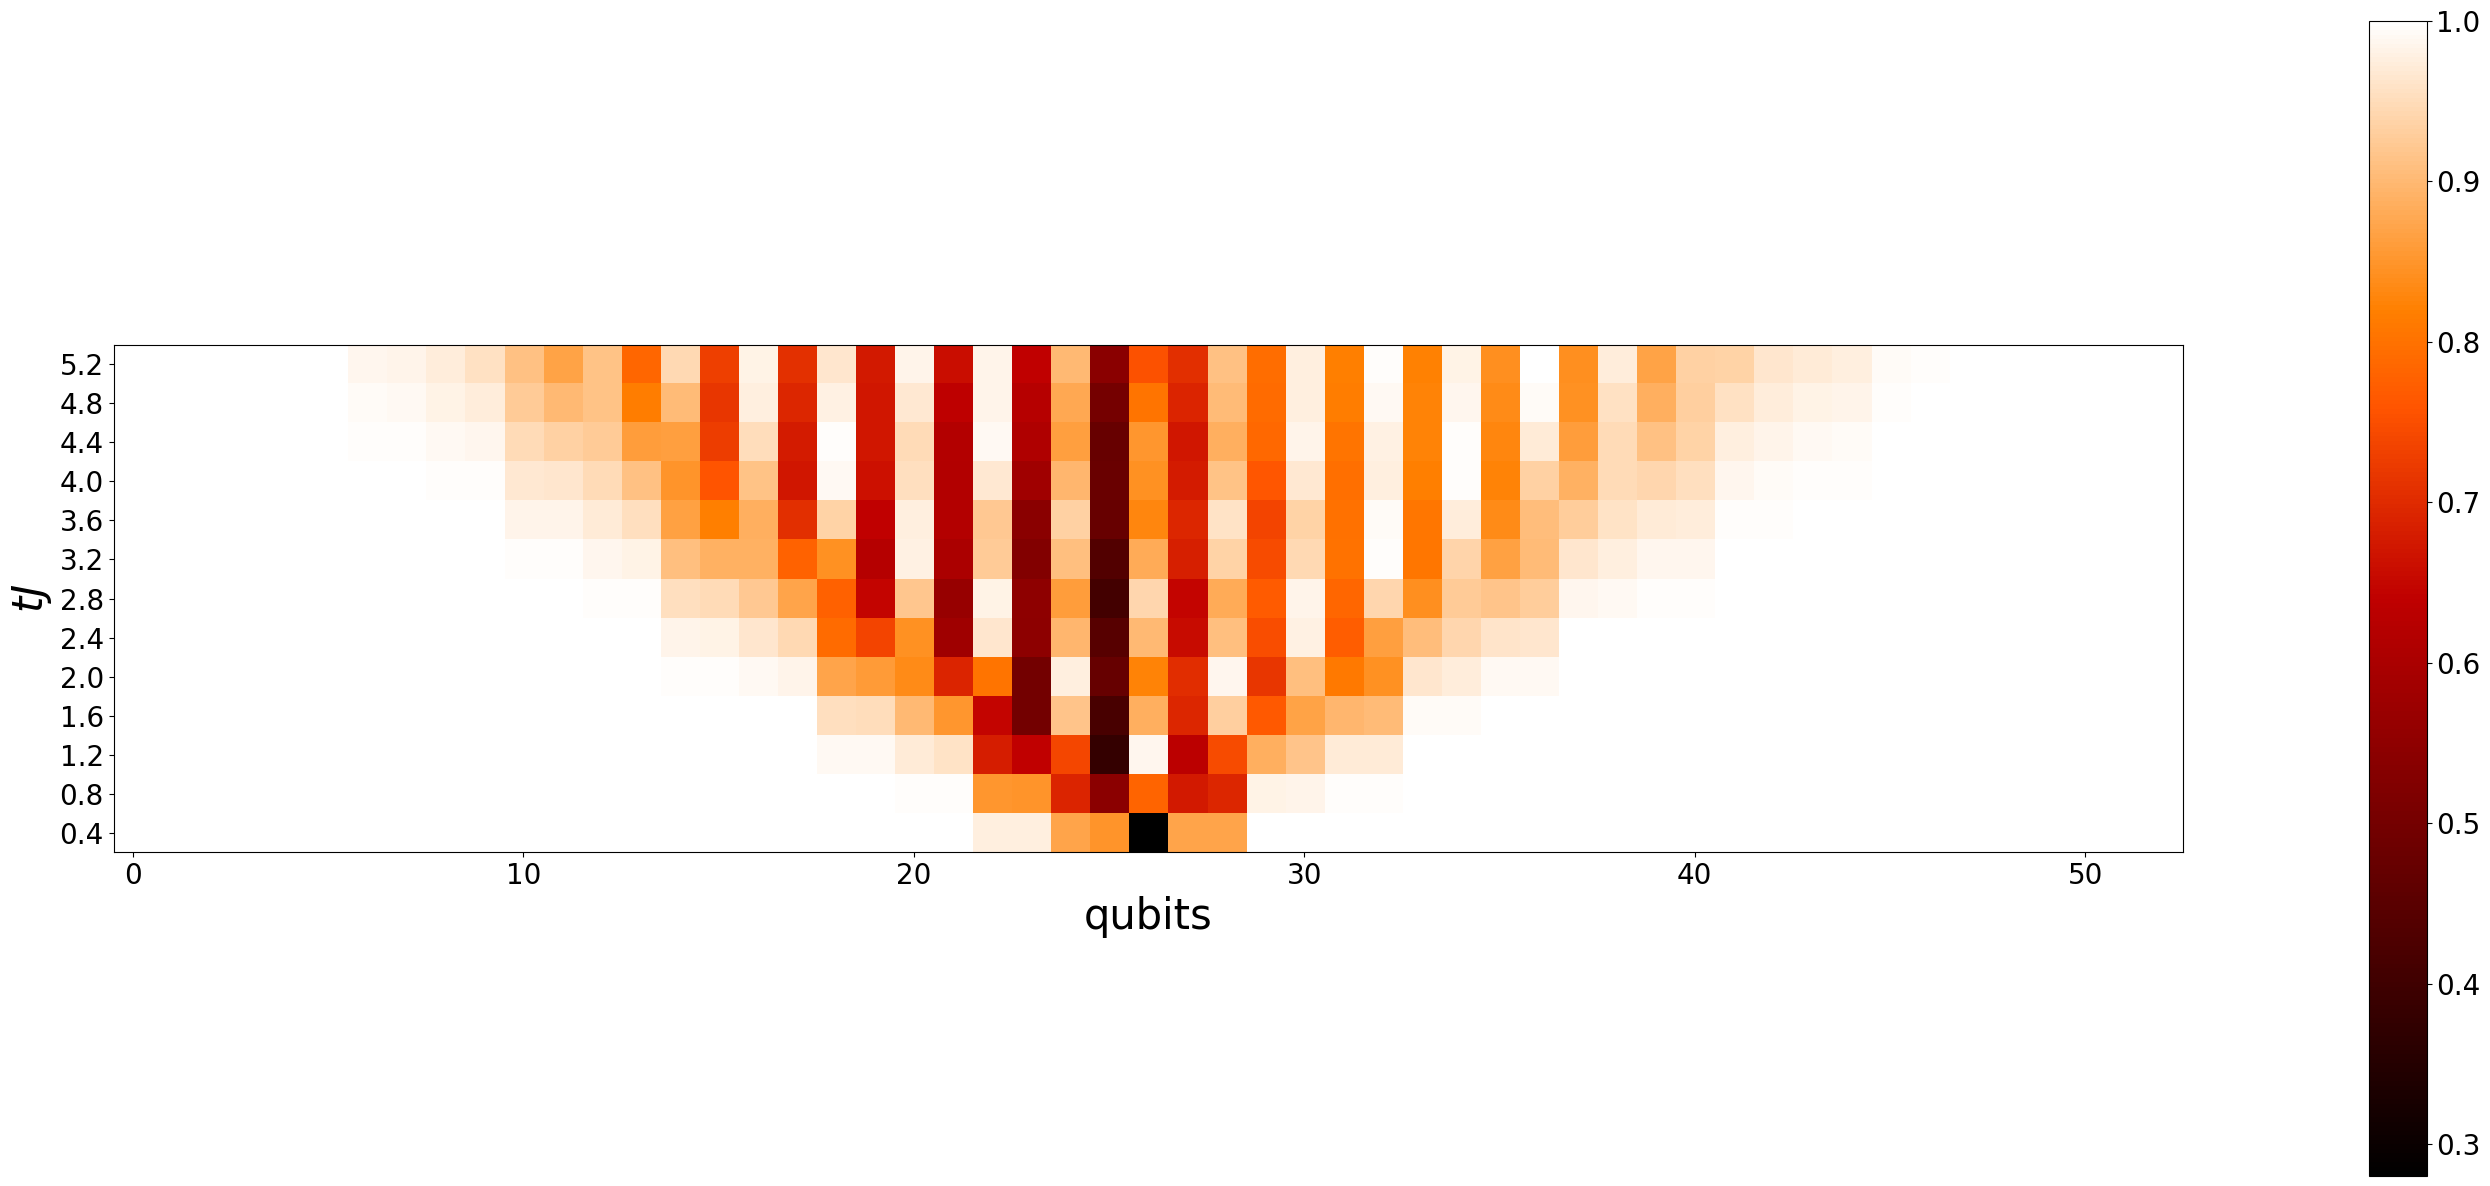

In [67]:
plot(truth)

<Figure size 640x480 with 0 Axes>

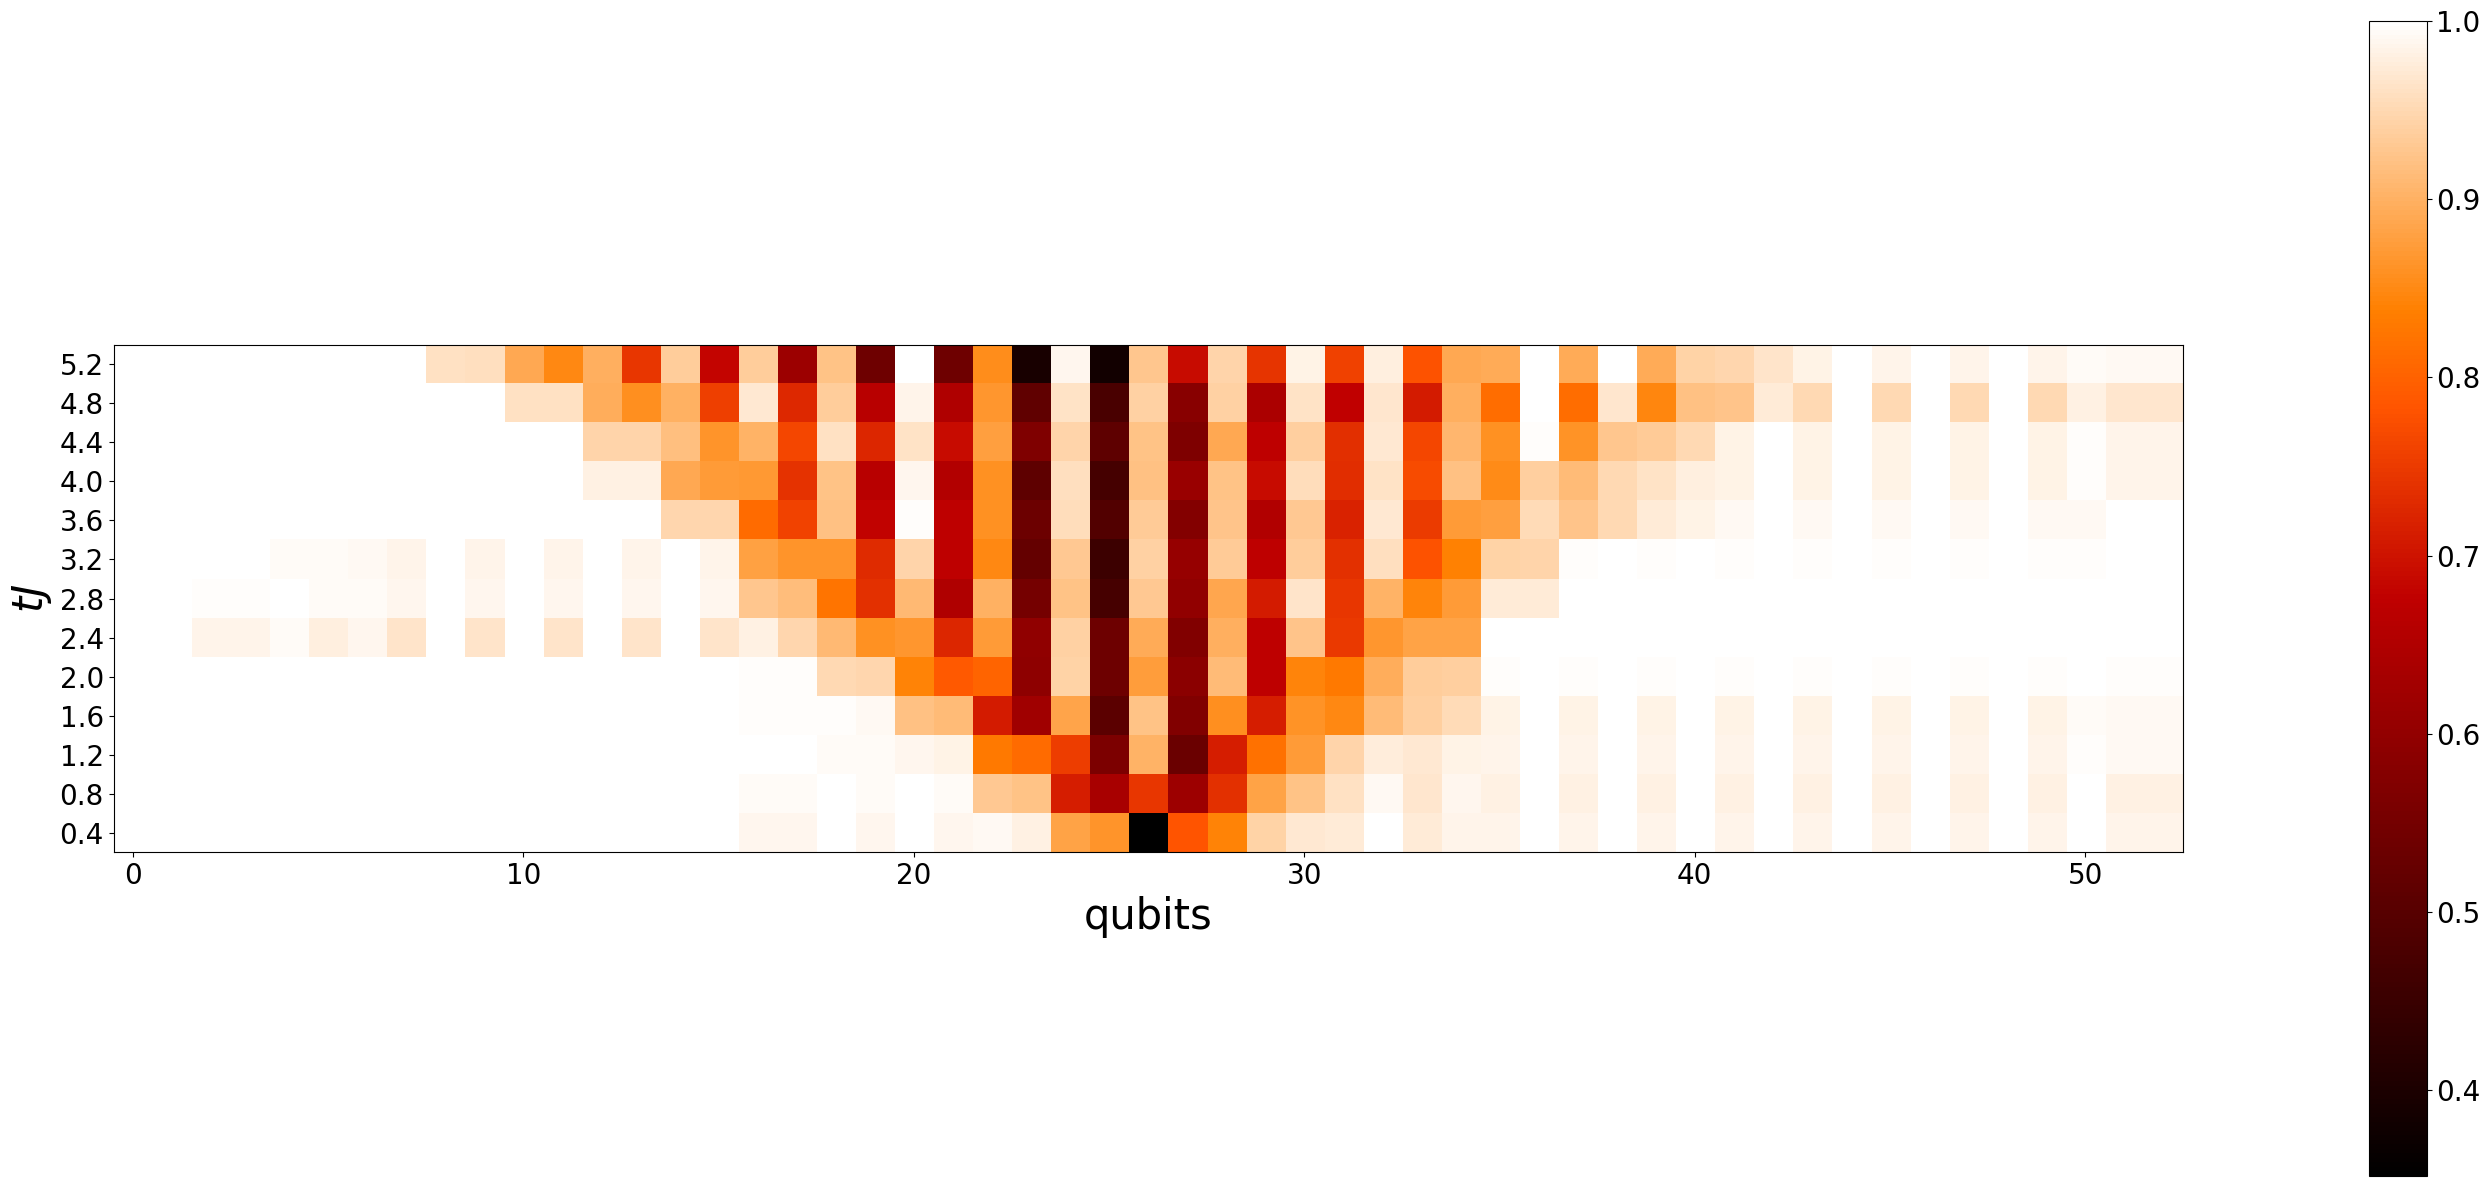

In [38]:
plot(evs_list_nopSym)

<Figure size 640x480 with 0 Axes>

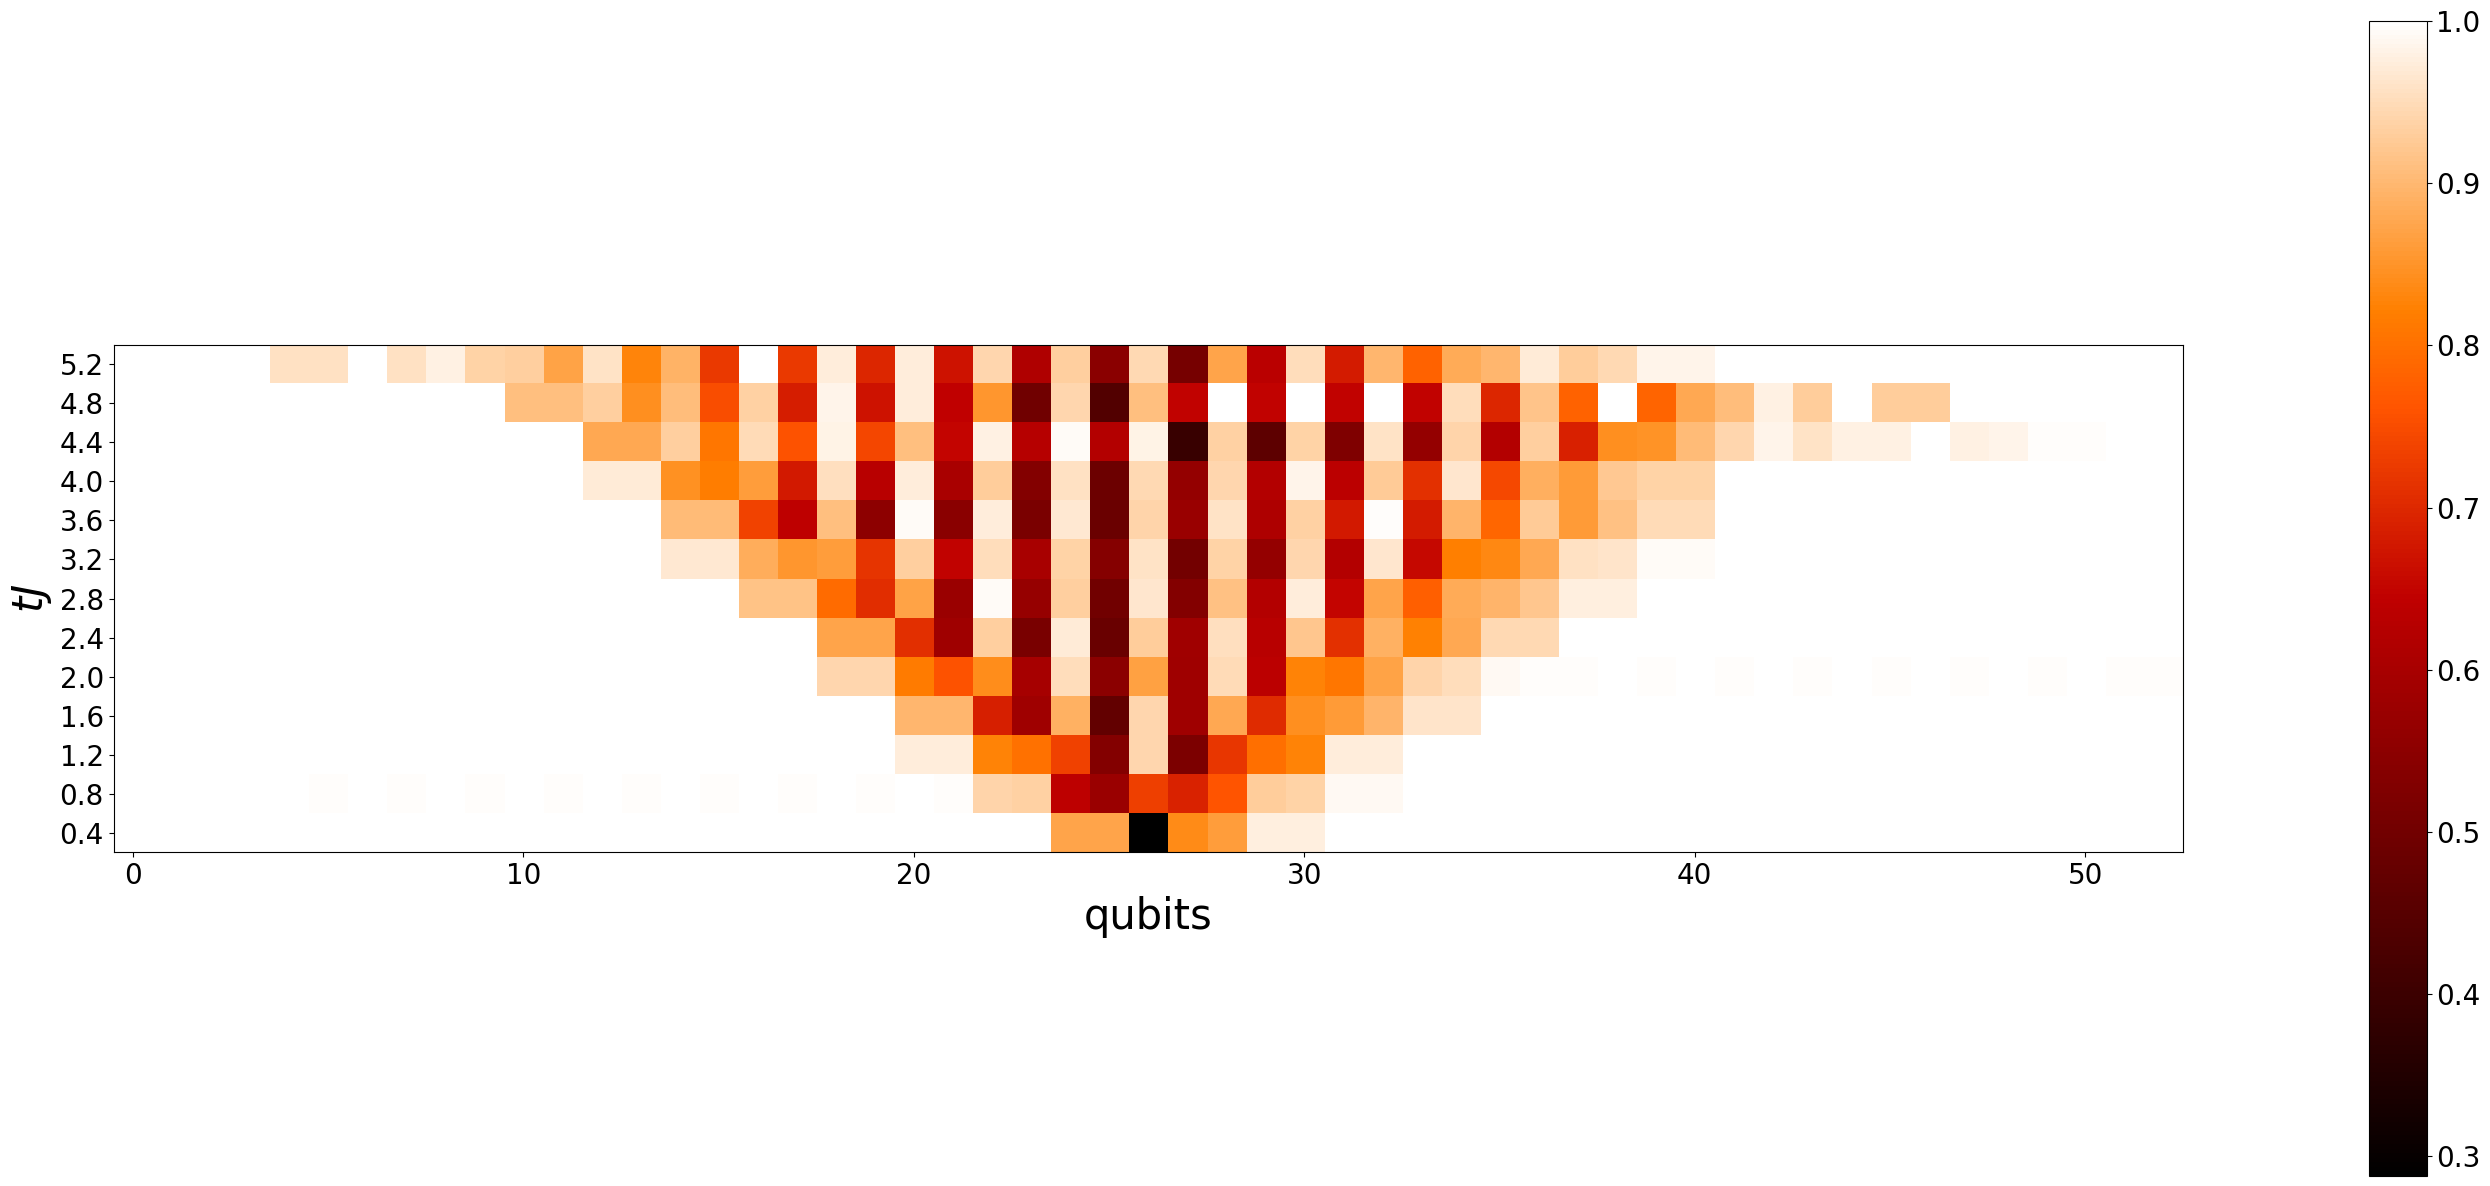

In [87]:
plot(torino_depo)

In [ ]:
diff_new = truth - evs_list_noSym
diff_new = (diff_new**2).sum(axis = 1)

diff_depo = truth - torino_depo
diff_depo = (diff_depo**2).sum(axis = 1)

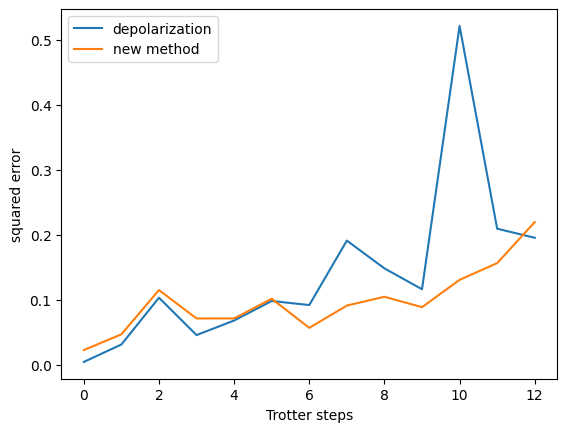

In [100]:
plt.plot(diff_depo, label = 'depolarization')
plt.plot(diff_new, label = 'new method')
#plt.yscale('log')
plt.xlabel('Trotter steps')
plt.ylabel('squared error')
plt.legend()
plt.show()

In [101]:
truth_sym = Symmetrize(truth)

In [104]:
diff_newSym = truth - evs_list
diff_newSym = (diff_newSym**2).sum(axis = 1)

diff_depoSym = truth - torino_depoSym 
diff_depoSym = (diff_depoSym**2).sum(axis = 1)

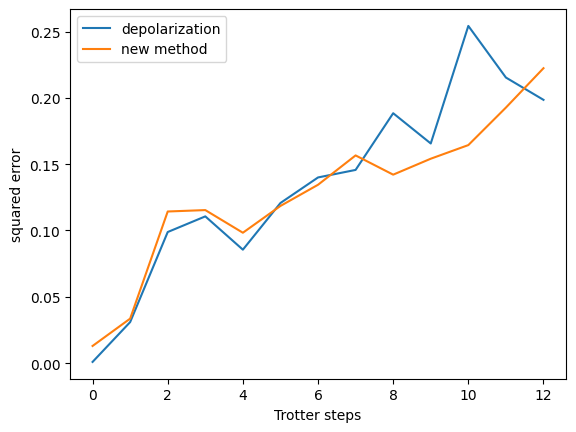

In [106]:
plt.plot(diff_depoSym, label = 'depolarization')
plt.plot(diff_newSym, label = 'new method')
#plt.yscale('log')
plt.xlabel('Trotter steps')
plt.ylabel('squared error')
plt.legend()
plt.show()